# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel as HSM

# Question 1

**Explain how you solve the model**

In [2]:
model = HSM.HouseholdSpecializationModelClass()

alpha_vector = [0.25,0.5,0.75]
sigma_vector = [0.5, 1, 1.5]
df = pd.DataFrame(columns= alpha_vector, index= sigma_vector)


for i in alpha_vector:
    for j in sigma_vector:
        model.par.alpha = i
        model.par.sigma = j
        results =model.solve_discrete()
        ratio = results.HF/results.HM
        df.loc[j,i] = ratio

#print(ratio)
print(df)





/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:64: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:69: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


         0.25 0.50      0.75
0.5  0.545455  1.0  1.833333
1.0  0.307692  1.0      3.25
1.5  0.214286  1.0  4.666667


/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:69: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


    wf   H ratio   w ratio
0  0.8  0.223144 -0.223144
1  0.9  0.000000 -0.105361
2  1.0  0.000000  0.000000
3  1.1 -0.117783  0.095310
4  1.2 -0.223144  0.182322


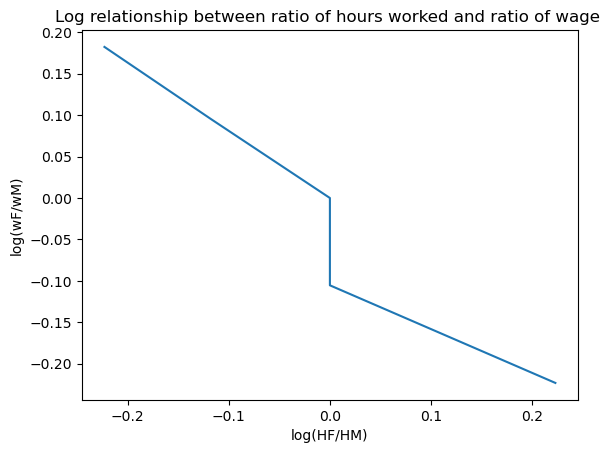

In [3]:
model.par.alpha = 0.5
model.par.sigma = 1

plot_df = pd.DataFrame({"wf": model.par.wF_vec})
logratioH=[]
logratiow=[]


for i in model.par.wF_vec:
    model.par.wF = i
    results =model.solve_discrete()
    logratioH.append(np.log(results.HF/results.HM))
    logratiow.append(np.log(i/model.par.wM))

plot_df["H ratio"] =  logratioH
plot_df["w ratio"] =  logratiow
print(plot_df)

fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(plot_df["H ratio"],plot_df["w ratio"])

ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)');

        





    wf   H ratio   w ratio
0  0.8  0.130284 -0.223144
1  0.9  0.000203 -0.105361
2  1.0  0.000000  0.000000
3  1.1 -0.000141  0.095310
4  1.2 -0.103383  0.182322


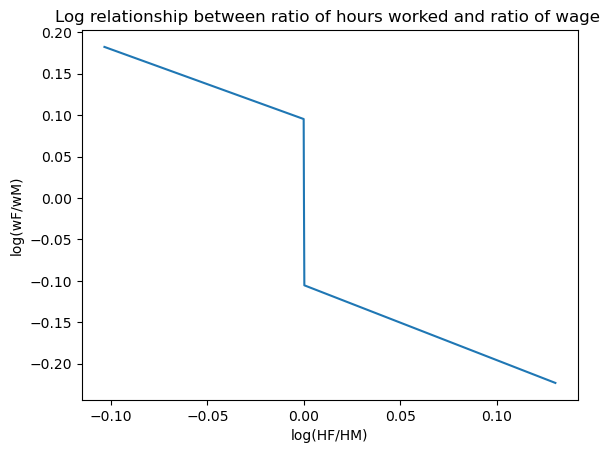

In [4]:
plot_dfc = pd.DataFrame({"wf": model.par.wF_vec})
logratioHc=[]
logratiowc=[]


#logratiow = pd.DataFrame(index= model.par.wF_vec)

for i in model.par.wF_vec:
    model.par.wF = i
    resultsc =model.solve()
    logratioHc.append(np.log(resultsc.HF/resultsc.HM))
    logratiowc.append(np.log(i/model.par.wM))

plot_dfc["H ratio"] =  logratioHc
plot_dfc["w ratio"] =  logratiowc
print(plot_dfc)

figc = plt.figure()

# b. plot
ax = figc.add_subplot(1,1,1)

ax.plot(plot_dfc["H ratio"],plot_dfc["w ratio"])

ax.set_title('Log relationship between ratio of hours worked and ratio of wage ')
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)');


In [10]:
model.solve_wF_vec()


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [9]:
model.run_regression()
model.sol.beta0, model.sol.beta1

(0.2942830427696814, -0.07299187991858813)

In [8]:
model.estimate()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

1


/Users/carolinebergholdthansen/Desktop/Introduction to Programming/projects-2023-cbjk/inauguralproject/HouseholdSpecializationModel.py:69: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


namespace(LM=4.0, HM=4.5, LF=5.0, HF=4.0, u=-0.2341393303073075)

namespace(LM=4.338729070535226,
          HM=4.417574787164814,
          LF=4.495725550103338,
          HF=4.416953528827589,
          u=-0.23420907186727205)

0.0625

[1 4 9]


# Question 2

Explain your code and procedure

In [ ]:
# code

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.